Sample decoded newswire: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3813 - loss: 3.1185 - val_accuracy: 0.6200 - val_loss: 1.7840
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6628 - loss: 1.6175 - val_accuracy: 0.7020 - val_loss: 1.3511
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7410 - loss: 1.2217 - val_accuracy: 0.7380 - val_loss: 1.1736
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7883 - loss: 0.9860 - val_accuracy: 0.7720 - val_loss: 1.0555
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8323 - loss:

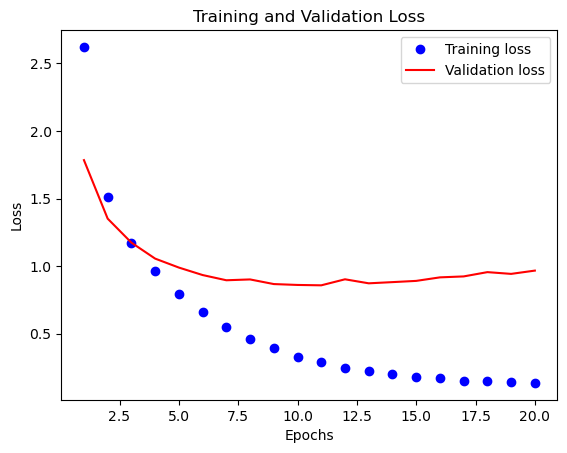

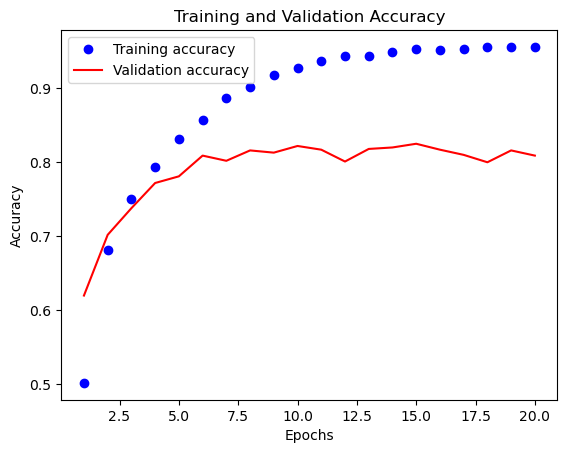

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9593 - loss: 0.1216 - val_accuracy: 0.8050 - val_loss: 0.9823
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9615 - loss: 0.1119 - val_accuracy: 0.8180 - val_loss: 0.9672
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9609 - loss: 0.1122 - val_accuracy: 0.8060 - val_loss: 1.0376
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9601 - loss: 0.1228 - val_accuracy: 0.8180 - val_loss: 0.9703
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9643 - loss: 0.1057 - val_accuracy: 0.8120 - val_loss: 1.0121
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9627 - loss: 0.1013 - val_accuracy: 0.8120 - val_loss: 1.0026
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9623 - loss: 0.1005 - val_accuracy: 0.8130 - val_loss: 1.0251
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9624 - loss: 0.0980 - val_accuracy: 0.7990 - v

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import copy

# Load Reuters dataset (top 10,000 words)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Decode a sample newswire (optional)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Sample decoded newswire:", decoded_newswire)

# Vectorize input data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One-hot encode labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Split validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Build model
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')  # 46 classes
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs_range, acc, 'bo', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retrain with fewer epochs (optional)
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))

# Evaluate model
results = model.evaluate(x_test, one_hot_test_labels)
print("Test Loss and Accuracy:", results)

# Baseline comparison with shuffled labels
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
baseline_accuracy = float(np.sum(hits_array)) / len(test_labels)
print("Baseline accuracy (random guess):", baseline_accuracy)

# Predict on test data
predictions = model.predict(x_test)
print("Prediction shape for first sample:", predictions[0].shape)
print("Sum of probabilities:", np.sum(predictions[0]))
print("Predicted class index:", np.argmax(predictions[0]))
